# H-SAF Soil Moisture Week 2019
Exercise - Application for soil moisture data assimilation for flood prediction

In this exercise we will test the sensitivity of flood response to initial soil moisture conditions. The comparison of optimal initial soil moisture condition for the different HSAF products will be carried out by selecting two flood events occurred in the study basin.

### Libraries

In [1]:
from MILc_2 import *
from pytesmo import temporal_matching
import ascat
from pytesmo import scaling
from pytesmo.time_series.filters import exp_filter

ModuleNotFoundError: No module named 'numpy'

<div style="text-align: justify">In this step the ground and satellite data will be loaded into the workspace.
To run the model for the study basin, please change the "name" variable according to the basin name, replace the correct basin area ("Ab" variable) value and change the H27_best and ctime_SWI_best variables according to the values obtained in exercise 5.</div>

In [2]:
name='TEVERE'
data_input=pd.read_csv(name+'_DATA.txt',index_col=0,header = None, names = ['P','T',
                                                                            'Q','H113',
                                                                            'H27_1',
                                                                            'H27_2',
                                                                            'H27_3',
                                                                            'H27_4'],
                       na_values='nan')

PAR=np.loadtxt(name+'_PAR.txt')
Ab=5270
fig=1
H27_best=data_input['H27_3'].values
input_SWI=data_input['H113'].values/100
ctime_SWI_best=30

<div style="text-align: justify">In this step, the model is run over the entire analysis period in order to identify one  flood event on which test the sensitivity of flood response to different initial soil moisture conditions.</div>

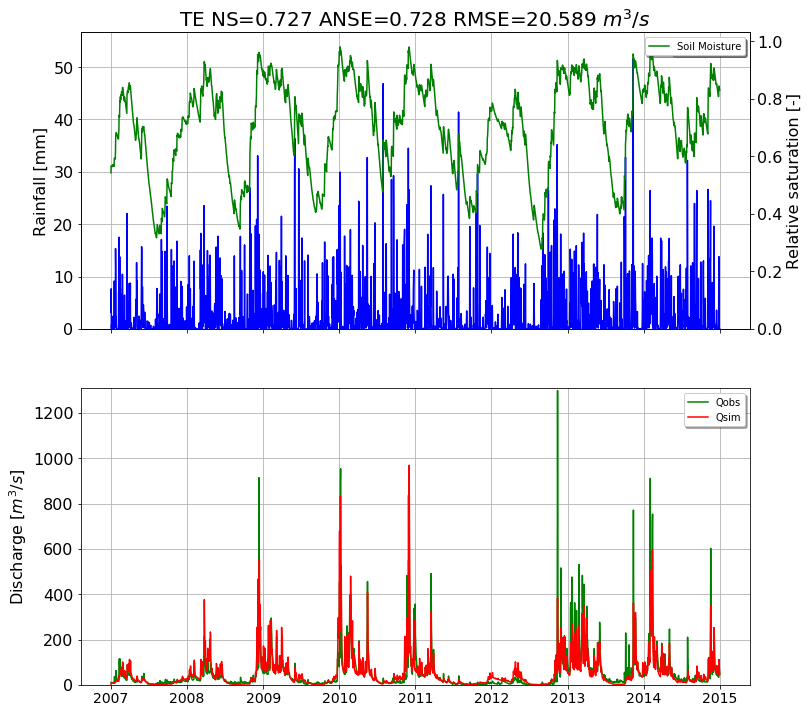

In [3]:
QobsQsim,data=MILC(name,data_input,PAR,Ab,1)

<div style="text-align: justify">In this step, filtering and rescaling techniques are applied to H27 and H113 data in order to obtain soil moisture estimates to be used within the r-r model.</div>

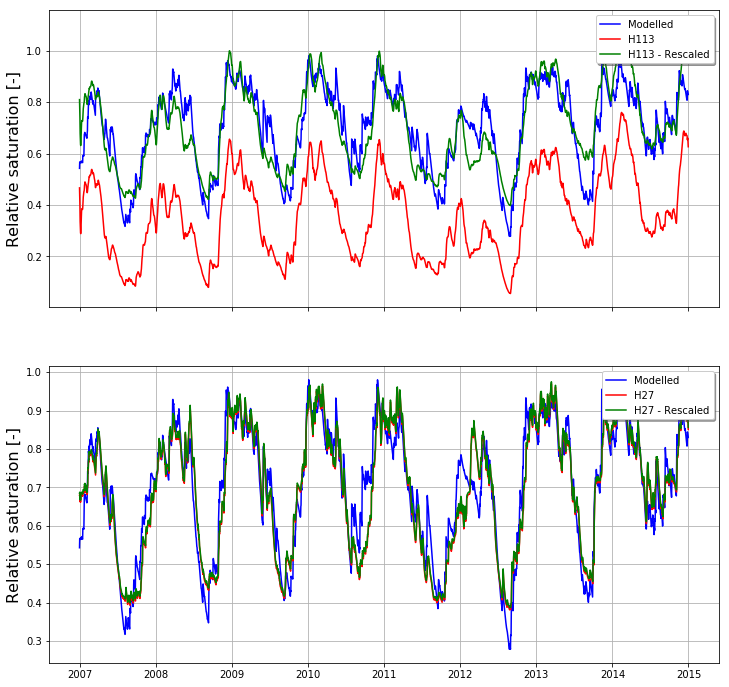

In [4]:
jd = data.index.to_julian_date().get_values()
SWI_best=exp_filter(input_SWI, jd, ctime=ctime_SWI_best)
SAT_scaled=scaling.mean_std(SWI_best,data['W'].values)
H27_scaled=scaling.mean_std(H27_best,data['W'].values)
f, ax = plt.subplots(2, sharex=True, figsize=(12, 12))
ax[0].tick_params(axis='x', labelsize=14)
ax[0].plot(data.index, data['W'].values,label='Modelled',color='b')
ax[0].plot(data.index, SWI_best,label='H113',color='r')
ax[0].plot(data.index, SAT_scaled,label='H113 - Rescaled',color='g')
ax[1].plot(data.index, data['W'].values,label='Modelled',color='b')
ax[1].plot(data.index, H27_best,label='H27',color='r')
ax[1].plot(data.index, H27_scaled,label='H27 - Rescaled',color='g')
ax[0].set_ylabel('Relative saturation [-]', fontsize=16) 
ax[1].set_ylabel('Relative saturation [-]', fontsize=16) 
ax[0].grid(True)
ax[1].grid(True)
ax[0].legend(loc='upper right', shadow=True)
ax[1].legend(loc='upper right', shadow=True)

DATA_SAT=pd.DataFrame({"H113": data_input['H113'].values/100, "SWI": SWI_best, "SWI_rescaled": SAT_scaled,
                       "H27": H27_best, "H27_rescaled": H27_scaled}, index=data.index)

<div style="text-align: justify">In this step, the model is run for the first flood event identified by a start ("start_ev1" variable) and end date ("end_ev1" variable). The soil moisture conditions at the beginning of the flood event are set equal to the ones provided by the model simulation, in order to obtain a reference run. To perform this analysis, select a flood event and change the "start_ev1" and "end_ev1" variables, accordingly.</div>

In [5]:
start_ev1='2010-11-11'
end_ev1='2010-12-11'
mask_ev1=(data.index > start_ev1) & (data.index <= end_ev1)
Ev1=data_input.iloc[mask_ev1]

Initial Soil Moisture from Model=0.8751205159512367


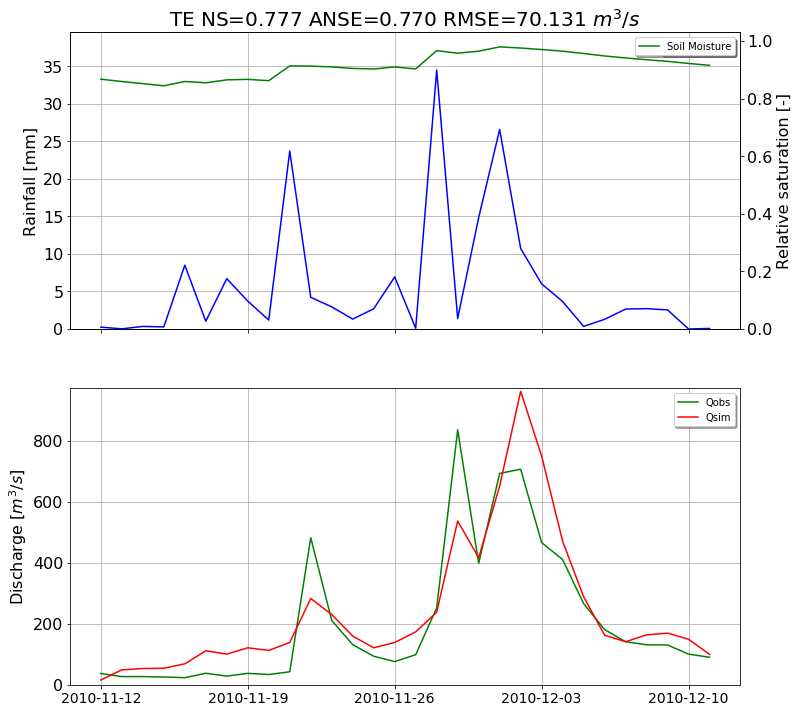

In [6]:
PAR[0]=data['W'].iloc[mask_ev1][0]
print('Initial Soil Moisture from Model='+str(PAR[0]))
QobsQsim,data=MILC(name,Ev1,PAR,Ab,fig)
Data_1=pd.DataFrame(data['W'].values, index=data.index)
Data_1.columns=['W_MOD']
Data_1=Data_1.join(data['S'])
Data_1.rename(columns={'S':'S_MOD'},inplace=True)

<div style="text-align: justify">In this step, the soil moisture conditions at the beginning of the flood event are set equal to the ones provided by the original H113 estimates. Which is the impact of the changed initial soil moisture condition in terms of discharge simulation?</div>

Initial Soil Moisture from H113=0.73360361


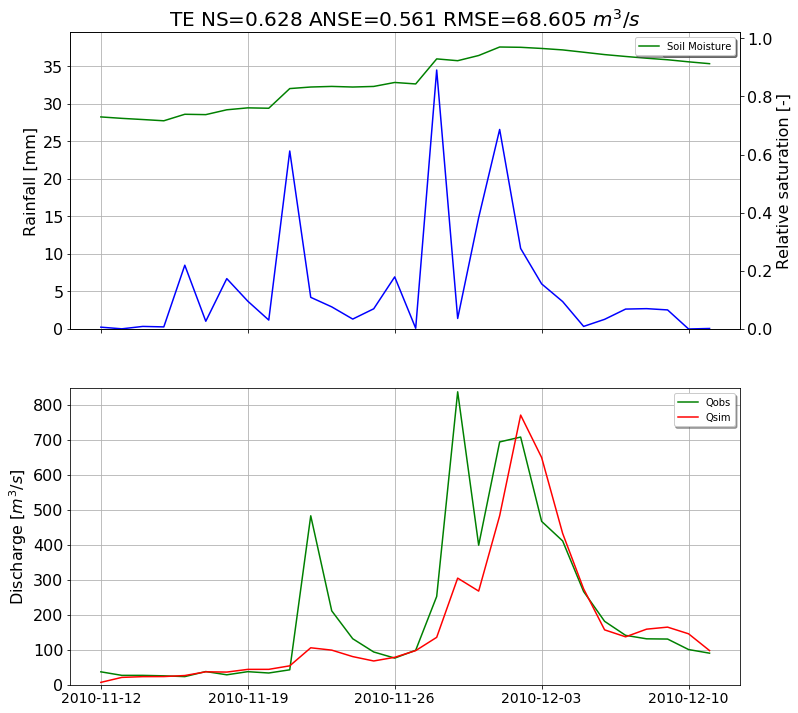

In [7]:
PAR[0]=DATA_SAT.iloc[mask_ev1]['H113'][0]
print('Initial Soil Moisture from H113='+str(PAR[0]))
QobsQsim,data=MILC(name,Ev1,PAR,Ab,fig)
Data_1=Data_1.join(data['W'])
Data_1.rename(columns={'W':'W_H113'},inplace=True)
Data_1=Data_1.join(data['S'])
Data_1.rename(columns={'S':'S_H113'},inplace=True)

<div style="text-align: justify">In this step, the soil moisture conditions at the beginning of the flood event are set equal to the ones provided by the H113 SWI estimates. Which is the impact of the changed initial soil moisture condition in terms of discharge simulation?</div>

Initial Soil Moisture from SWI=0.4259260297805447


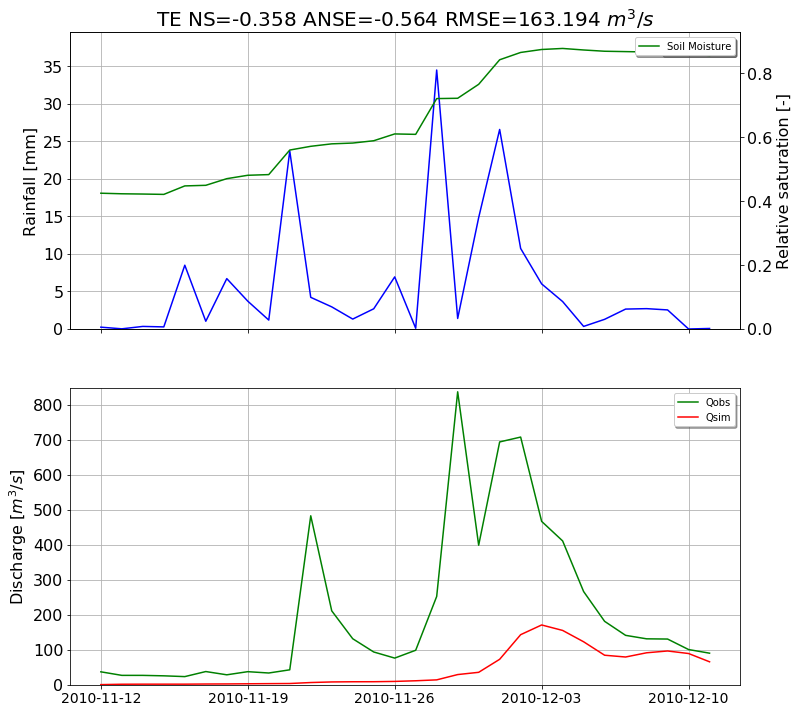

In [8]:
PAR[0]=DATA_SAT.iloc[mask_ev1]['SWI'][0]
print('Initial Soil Moisture from SWI='+str(PAR[0]))
QobsQsim,data=MILC(name,Ev1,PAR,Ab,fig)
Data_1=Data_1.join(data['W'])
Data_1.rename(columns={'W':'W_SWI'},inplace=True)
Data_1=Data_1.join(data['S'])
Data_1.rename(columns={'S':'S_SWI'},inplace=True)

<div style="text-align: justify">In this step, the soil moisture conditions at the beginning of the flood event are set equal to the ones provided by the SWI rescaled estimates. Which is the impact of the changed initial soil moisture condition in terms of discharge simulation?</div>

Initial Soil Moisture from SWi Rescaled=0.769077697189562


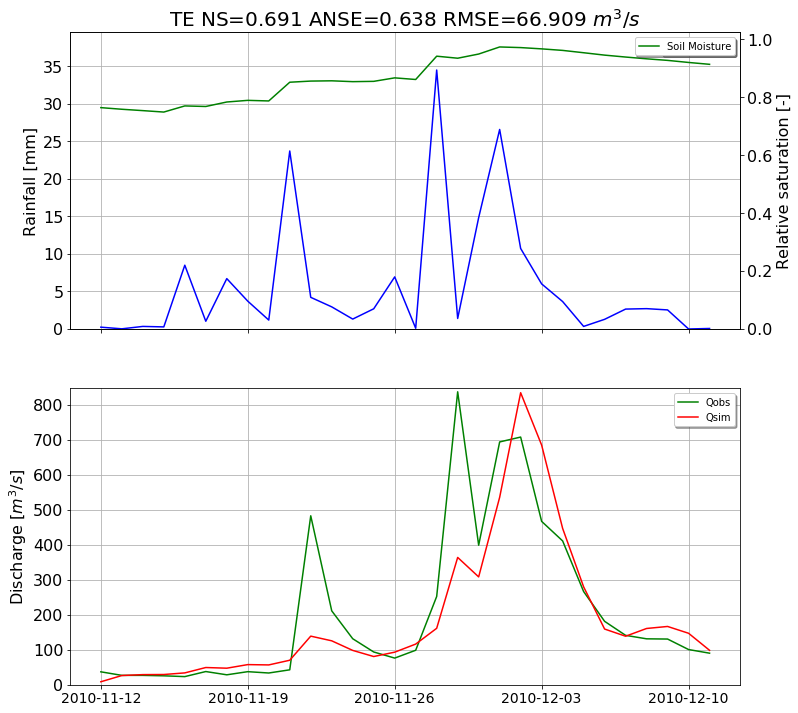

In [9]:
PAR[0]=DATA_SAT.iloc[mask_ev1]['SWI_rescaled'][0]
print('Initial Soil Moisture from SWi Rescaled='+str(PAR[0]))
QobsQsim,data=MILC(name,Ev1,PAR,Ab,fig)
Data_1=Data_1.join(data['W'])
Data_1.rename(columns={'W':'W_SWI_rescaled'},inplace=True)
Data_1=Data_1.join(data['S'])
Data_1.rename(columns={'S':'S_SWI_rescaled'},inplace=True)

<div style="text-align: justify">In this step, the soil moisture conditions at the beginning of the flood event are set equal to the ones provided by the original H27 estimates. Which is the impact of the changed initial soil moisture condition in terms of discharge simulation?</div>

Initial Soil Moisture from H27=0.7574489999999999


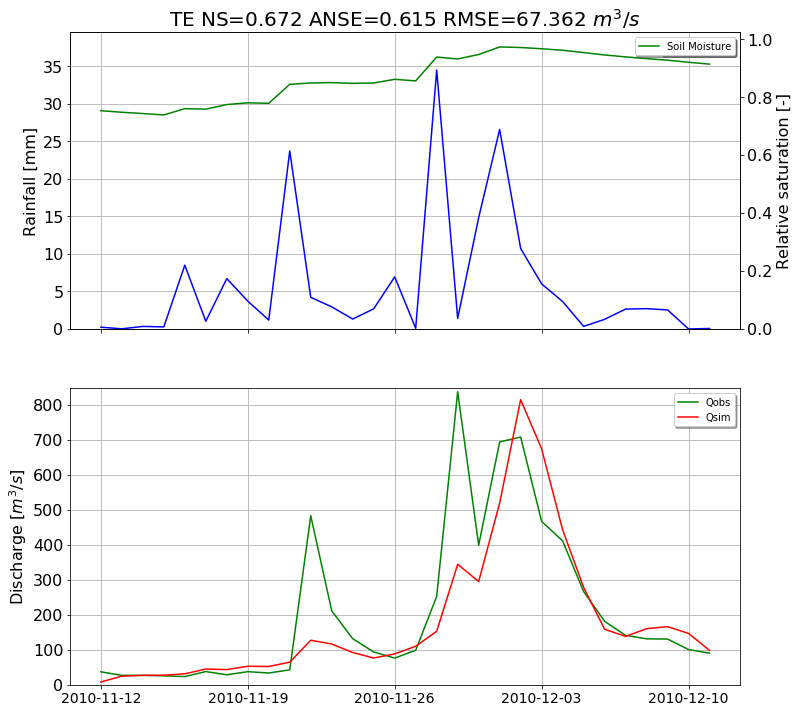

In [10]:
PAR[0]=DATA_SAT.iloc[mask_ev1]['H27'][0]
print('Initial Soil Moisture from H27='+str(PAR[0]))
QobsQsim,data=MILC(name,Ev1,PAR,Ab,fig)
Data_1=Data_1.join(data['W'])
Data_1.rename(columns={'W':'W_H27'},inplace=True)
Data_1=Data_1.join(data['S'])
Data_1.rename(columns={'S':'S_H27'},inplace=True)

<div style="text-align: justify">In this step, the soil moisture conditions at the beginning of the flood event are set equal to the ones provided by the H27 rescaled estimates. Which is the impact of the changed initial soil moisture condition in terms of discharge simulation?.</div>

Initial Soil Moisture from H27 Rescaled=0.7628379506222583


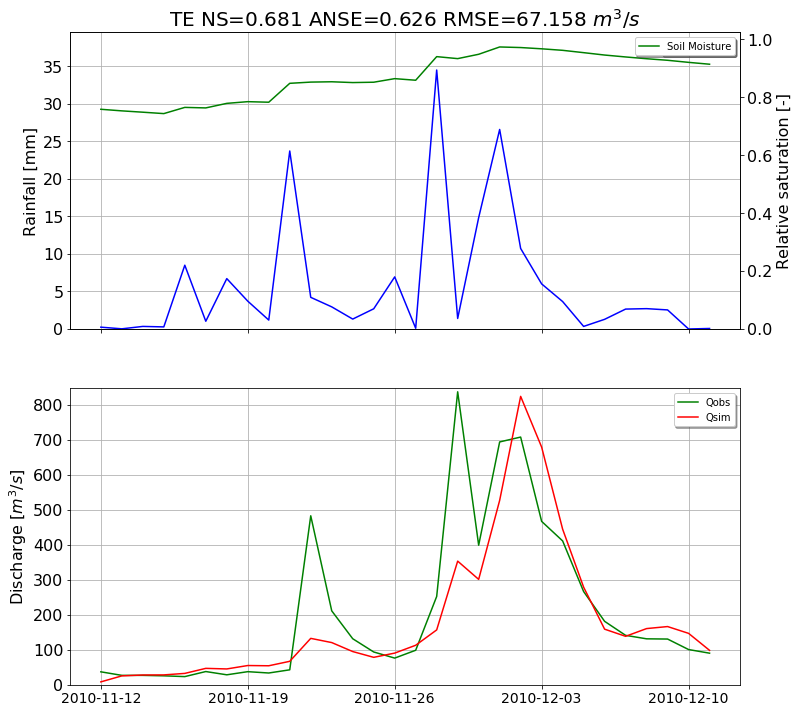

In [11]:
PAR[0]=DATA_SAT.iloc[mask_ev1]['H27_rescaled'][0]
print('Initial Soil Moisture from H27 Rescaled='+str(PAR[0]))
QobsQsim,data=MILC(name,Ev1,PAR,Ab,fig)
Data_1=Data_1.join(data['W'])
Data_1.rename(columns={'W':'W_H27_rescaled'},inplace=True)
Data_1=Data_1.join(data['S'])
Data_1.rename(columns={'S':'S_H27_rescaled'},inplace=True)

<div style="text-align: justify">After the different model runs, identify the soil moisture initial condition that provided the best NS value.</div>

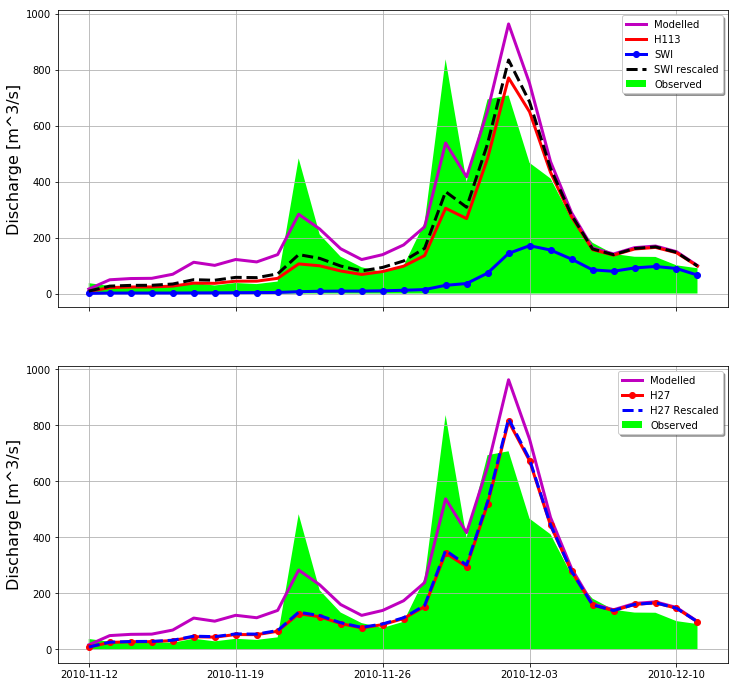

In [12]:
f, ax = plt.subplots(2, sharex=True, figsize=(12, 12))
ax[0].tick_params(axis='x', labelsize=14)
ax[0].fill_between(Ev1.index, Ev1['Q'].values,label='Observed',facecolor=(0, 1, 0))
ax[0].plot(Data_1.index, Data_1['S_MOD'].values,label='Modelled',color='m',linewidth=3.0)
ax[0].plot(Data_1.index, Data_1['S_H113'].values,label='H113',color='r',linewidth=3.0)
ax[0].plot(Data_1.index, Data_1['S_SWI'].values,'r-o',label='SWI',color='b',linewidth=3.0)
ax[0].plot(Data_1.index, Data_1['S_SWI_rescaled'].values,'r--',label='SWI rescaled',color='k',
           linewidth=3.0)
ax[1].fill_between(Ev1.index, Ev1['Q'].values,label='Observed',facecolor=(0, 1, 0))
ax[1].plot(Data_1.index, Data_1['S_MOD'].values,label='Modelled',color='m',linewidth=3.0)
ax[1].plot(Data_1.index, Data_1['S_H27'].values,'r-o',label='H27',color='r',linewidth=3.0)
ax[1].plot(Data_1.index, Data_1['S_H27_rescaled'].values,'r--',label='H27 Rescaled',color='b',
           linewidth=3.0)
ax[0].set_ylabel('Discharge [m^3/s]', fontsize=16) 
ax[1].set_ylabel('Discharge [m^3/s]', fontsize=16) 
ax[0].grid(True)
ax[1].grid(True)
ax[0].legend(loc='upper right', shadow=True)
ax[1].legend(loc='upper right', shadow=True)

<div style="text-align: justify">In this step, the model is run for the second flood event identified by a start ("start_ev2" variable) and end date ("end_ev2" variable). The soil moisture conditions at the beginning of the flood event are set equal to the ones provided by the model simulation, in order to obtain a reference run. To perform this analysis, select a flood event and change the "start_ev2" and "end_ev2" variables, accordingly.</div>

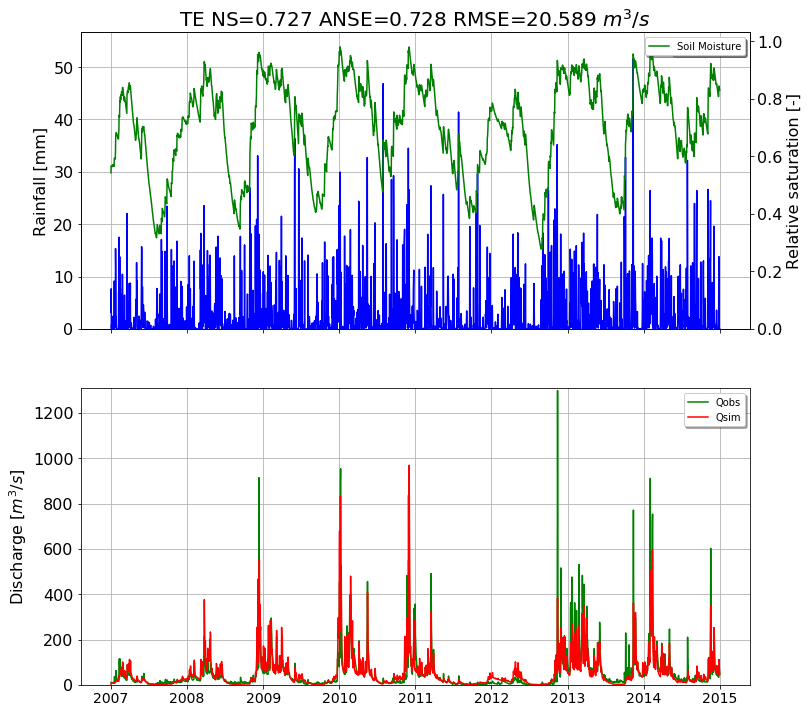

In [13]:
PAR=np.loadtxt(name+'_PAR.txt')
QobsQsim,data=MILC(name,data_input,PAR,Ab,fig)

<div style="text-align: justify">In this step, the soil moisture conditions at the beginning of the flood event are set equal to the ones provided by the original and rescaled HSAF estimates. Which is the impact of the changed initial soil moisture condition in terms of discharge simulation?.</div>

In [14]:
start_ev2='2009-12-27'
end_ev2='2010-01-17'
mask_ev2=(data.index > start_ev2) & (data.index <= end_ev2)
Ev2=data_input.iloc[mask_ev2]
PAR[0]=data['W'].iloc[mask_ev2][0]
print('Initial Soil Moisture from Model='+str(PAR[0]))
QobsQsim,data=MILC(name,Ev2,PAR,Ab,0)
Data_2=pd.DataFrame(data['W'].values, index=data.index)
Data_2.columns=['W_MOD']
Data_2=Data_2.join(data['S'])
Data_2.rename(columns={'S':'S_MOD'},inplace=True)
print('NS from Model='+str(QobsQsim.NS()))
PAR[0]=DATA_SAT.iloc[mask_ev2]['H113'][0]
print('Initial Soil Moisture from H113='+str(PAR[0]))
QobsQsim,data=MILC(name,Ev2,PAR,Ab,0)
Data_2=Data_2.join(data['W'])
Data_2.rename(columns={'W':'W_H113'},inplace=True)
Data_2=Data_2.join(data['S'])
Data_2.rename(columns={'S':'S_H113'},inplace=True)
print('NS from H113='+str(QobsQsim.NS()))
PAR[0]=DATA_SAT.iloc[mask_ev2]['SWI'][0]
print('Initial Soil Moisture from SWI='+str(PAR[0]))
QobsQsim,data=MILC(name,Ev2,PAR,Ab,0)
Data_2=Data_2.join(data['W'])
Data_2.rename(columns={'W':'W_SWI'},inplace=True)
Data_2=Data_2.join(data['S'])
Data_2.rename(columns={'S':'S_SWI'},inplace=True)
print('NS from SWI='+str(QobsQsim.NS()))
PAR[0]=DATA_SAT.iloc[mask_ev2]['SWI_rescaled'][0]
print('Initial Soil Moisture from SWI Rescaled='+str(PAR[0]))
QobsQsim,data=MILC(name,Ev2,PAR,Ab,0)
Data_2=Data_2.join(data['W'])
Data_2.rename(columns={'W':'W_SWI_rescaled'},inplace=True)
Data_2=Data_2.join(data['S'])
Data_2.rename(columns={'S':'S_SWI_rescaled'},inplace=True)
print('NS from SWI Rescaled='+str(QobsQsim.NS()))
PAR[0]=DATA_SAT.iloc[mask_ev2]['H27'][0]
print('Initial Soil Moisture from H27='+str(PAR[0]))
QobsQsim,data=MILC(name,Ev2,PAR,Ab,0)
Data_2=Data_2.join(data['W'])
Data_2.rename(columns={'W':'W_H27'},inplace=True)
Data_2=Data_2.join(data['S'])
Data_2.rename(columns={'S':'S_H27'},inplace=True)
print('NS from H27='+str(QobsQsim.NS()))
PAR[0]=DATA_SAT.iloc[mask_ev2]['H27_rescaled'][0]
print('Initial Soil Moisture from H27 Rescaled='+str(PAR[0]))
QobsQsim,data=MILC(name,Ev2,PAR,Ab,0)
Data_2=Data_2.join(data['W'])
Data_2.rename(columns={'W':'W_H27_rescaled'},inplace=True)
Data_2=Data_2.join(data['S'])
Data_2.rename(columns={'S':'S_H27_rescaled'},inplace=True)
print('NS from H27 Rescaled='+str(QobsQsim.NS()))

Initial Soil Moisture from Model=0.9188554535343101
NS from Model=0.5356599359146216
Initial Soil Moisture from H113=0.69950366
NS from H113=0.4590329569544431
Initial Soil Moisture from SWI=0.5245542233847812
NS from SWI=-0.414237127361218
Initial Soil Moisture from SWI Rescaled=0.8680031295431712
NS from SWI Rescaled=0.7221151610017555
Initial Soil Moisture from H27=0.887417
NS from H27=0.6680587633911872
Initial Soil Moisture from H27 Rescaled=0.8926429719738647
NS from H27 Rescaled=0.6499286785914231


<div style="text-align: justify">After the different model runs, identify the soil moisture initial condition that provided the best NS value.</div>

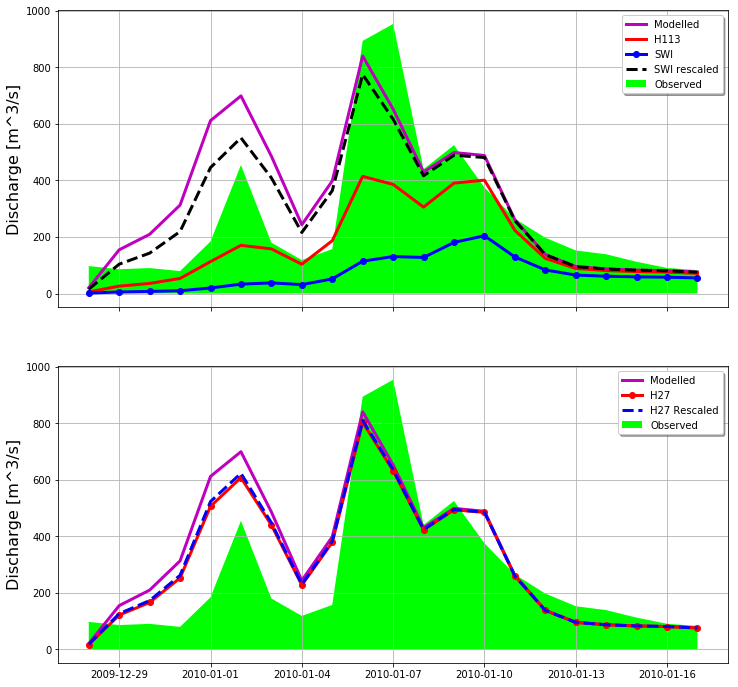

In [15]:
f, ax = plt.subplots(2, sharex=True, figsize=(12, 12))
ax[0].tick_params(axis='x', labelsize=14)
ax[0].fill_between(Ev2.index, Ev2['Q'].values,label='Observed',facecolor=(0, 1, 0))
ax[0].plot(Data_2.index, Data_2['S_MOD'].values,label='Modelled',color='m',linewidth=3.0)
ax[0].plot(Data_2.index, Data_2['S_H113'].values,label='H113',color='r',linewidth=3.0)
ax[0].plot(Data_2.index, Data_2['S_SWI'].values,'r-o',label='SWI',color='b',linewidth=3.0)
ax[0].plot(Data_2.index, Data_2['S_SWI_rescaled'].values,'r--',label='SWI rescaled',color='k',
           linewidth=3.0)
ax[1].fill_between(Ev2.index, Ev2['Q'].values,label='Observed',facecolor=(0, 1, 0))
ax[1].plot(Data_2.index, Data_2['S_MOD'].values,label='Modelled',color='m',linewidth=3.0)
ax[1].plot(Data_2.index, Data_2['S_H27'].values,'r-o',label='H27',color='r',linewidth=3.0)
ax[1].plot(Data_2.index, Data_2['S_H27_rescaled'].values,'r--',label='H27 Rescaled',color='b',
           linewidth=3.0)
ax[0].set_ylabel('Discharge [m^3/s]', fontsize=16) 
ax[1].set_ylabel('Discharge [m^3/s]', fontsize=16) 
ax[0].grid(True)
ax[1].grid(True)
ax[0].legend(loc='upper right', shadow=True)
ax[1].legend(loc='upper right', shadow=True)

<div style="text-align: justify">For each flood event, summarize the obtained results in terms of initial soil moisture conditions and NS as shown during the lecture 10. Discuss the results highlighting the sensitivity of flood responde to initial soil moisture conditions.</div>